In [1]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
!pip install tensorflow

In [3]:
!pip install opencv-python


In [4]:
!pip install matplotlib

In [5]:
import tensorflow as tf
import os

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth('GPU')

In [7]:
gpus

[]

In [8]:
pip list

Package                 VersionNote: you may need to restart the kernel to use updated packages.

----------------------- -----------
absl-py                 2.1.0
asttokens               3.0.0
astunparse              1.6.3
certifi                 2025.1.31
charset-normalizer      3.4.1
colorama                0.4.6
comm                    0.2.2
contourpy               1.3.1
cycler                  0.12.1
debugpy                 1.8.12
decorator               5.1.1
executing               2.2.0
flatbuffers             25.2.10
fonttools               4.56.0
gast                    0.6.0
google-pasta            0.2.0
grpcio                  1.70.0
h5py                    3.12.1
idna                    3.10
ipykernel               6.29.5
ipython                 8.32.0
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.7.2
keras                   3.8.0
kiwisolver              1.4.8
libclang                18.1.1
Markdown                3.7
markdown-it-py

In [10]:
import cv2
import imghdr as ih

In [11]:
data_dir = 'data'

In [12]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [13]:
os.listdir(data_dir)

['happy', 'sad']

In [14]:
#os.listdir(os.path.join(data_dir,'happy'))

In [80]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            imag = cv2.imread(image_path)
            tip = ih.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
    

In [16]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [81]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [82]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 545 files belonging to 2 classes.


In [37]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [38]:
##data_iterator = data.as_numpy_iterator()

In [83]:
##batch = data_iterator.next()

In [84]:
len(batch) 

2

In [85]:
batch[0].shape

(1, 256, 256, 3)

In [88]:
# Preprocessing

In [89]:
data = data.map(lambda x,y:(x/255,y)) # x imdependent featues y target feature

In [90]:
scaled_iterator = data.as_numpy_iterator()

In [91]:
batch = scaled_iterator.next()

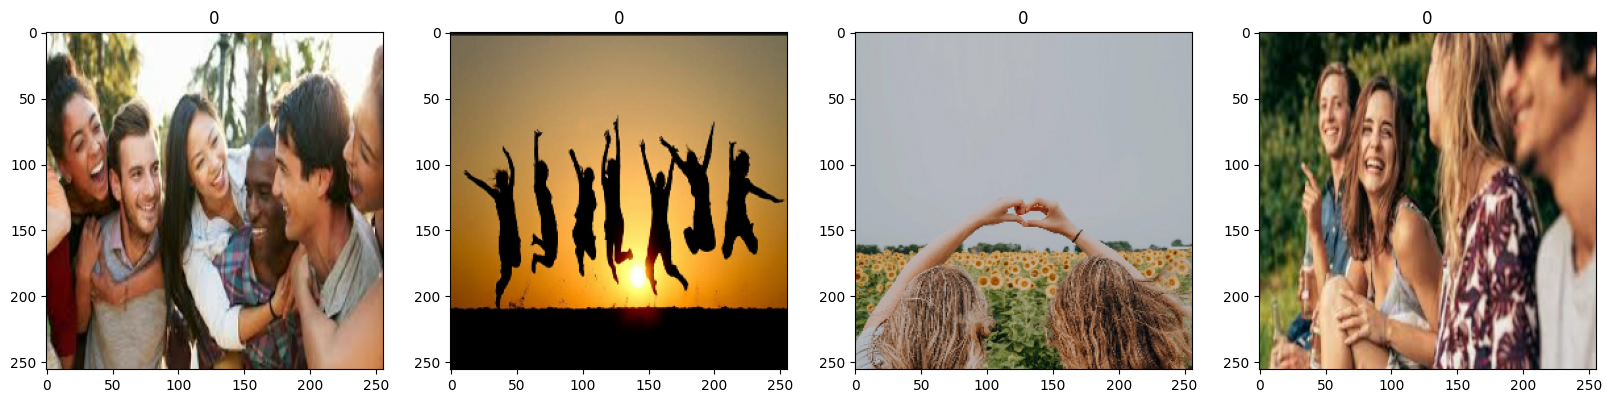

In [92]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [93]:
batch[0].min()

np.float32(0.0)

In [94]:
## Split Data

In [95]:
len(data)

18

In [96]:
train_size = int(len(data)*.7)
val_size  = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [97]:
train_size,val_size,test_size

(12, 4, 2)

In [98]:
val_size + test_size + train_size == len(data)

True

In [99]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [100]:
## Build Model 

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [102]:
 model = Sequential()

In [103]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
          
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [104]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [105]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [106]:
## Train

In [107]:
logdir = 'logs'

In [108]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [109]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 348ms/step - accuracy: 0.7309 - loss: 0.8547 - val_accuracy: 0.7422 - val_loss: 0.4726
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 311ms/step - accuracy: 0.7563 - loss: 0.4943 - val_accuracy: 0.8516 - val_loss: 0.3423
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 304ms/step - accuracy: 0.8539 - loss: 0.3280 - val_accuracy: 0.8594 - val_loss: 0.2964
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 315ms/step - accuracy: 0.8969 - loss: 0.2814 - val_accuracy: 0.8750 - val_loss: 0.2573
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.8714 - loss: 0.3005 - val_accuracy: 0.8672 - val_loss: 0.3080
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 365ms/step - accuracy: 0.9025 - loss: 0.2222 - val_accuracy: 0.9219 - val_loss: 0.1853
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 348ms/step - accuracy: 0.9463 - loss: 0.1568 - val_accuracy: 0.9531 - val_loss: 0.1516
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 346ms/step - accuracy: 0.9566 - loss: 0.1556 - val_accuracy: 0.

In [110]:
hist.history

{'accuracy': [0.7447916865348816,
  0.7734375,
  0.8645833134651184,
  0.8958333134651184,
  0.875,
  0.90625,
  0.9401041865348816,
  0.9401041865348816,
  0.9583333134651184,
  0.9557291865348816,
  0.9609375,
  0.96875,
  0.9817708134651184,
  0.9921875,
  0.9921875,
  0.9921875,
  0.9921875,
  0.9947916865348816,
  0.9947916865348816,
  0.9947916865348816],
 'loss': [0.695364236831665,
  0.465375691652298,
  0.3225241005420685,
  0.2954024076461792,
  0.32191362977027893,
  0.21395020186901093,
  0.17671407759189606,
  0.1934046596288681,
  0.13299769163131714,
  0.14198420941829681,
  0.09010094404220581,
  0.0735064297914505,
  0.054386138916015625,
  0.03227880969643593,
  0.02917802892625332,
  0.03272300958633423,
  0.026369089260697365,
  0.01769128255546093,
  0.015337389893829823,
  0.012478468008339405],
 'val_accuracy': [0.7421875,
  0.8515625,
  0.859375,
  0.875,
  0.8671875,
  0.921875,
  0.953125,
  0.9453125,
  0.9375,
  0.984375,
  0.984375,
  0.984375,
  1.0,
  1.0

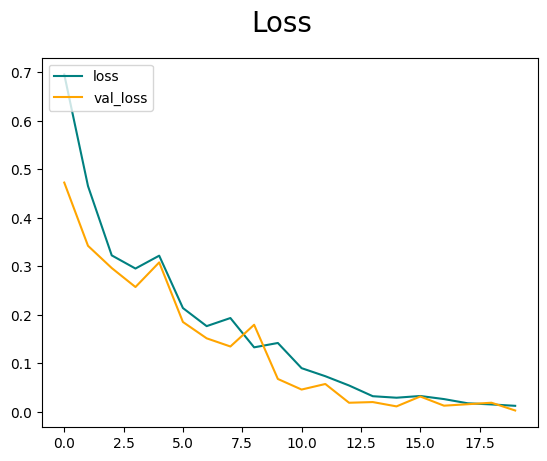

In [111]:
fig = plt.figure()
plt.plot(hist.history['loss'],color ='teal',label='loss')
plt.plot(hist.history['val_loss'],color ='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

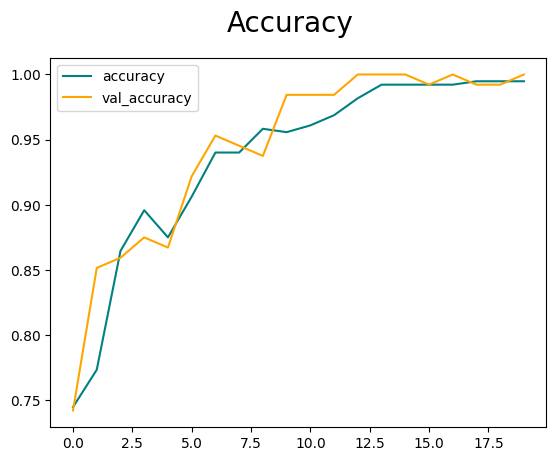

In [112]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color ='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color ='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [113]:
## Evaluation

In [114]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy # Measures typically for classificatio

In [115]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [116]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [117]:
print(f'Precision: {pre.result().numpy()},Recall: {re.result().numpy()},Accuracy: {acc.result().numpy()}')

Precision: 1.0,Recall: 1.0,Accuracy: 1.0


In [118]:
## Test

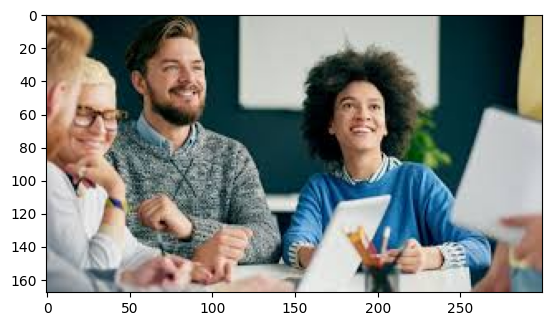

In [124]:
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

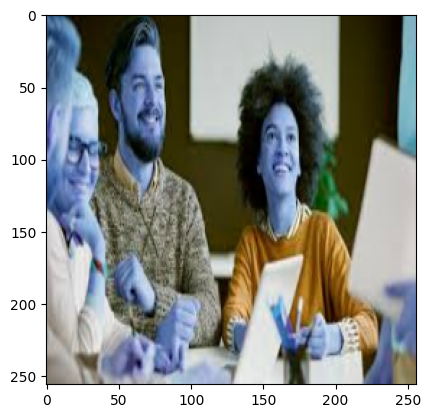

In [130]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [134]:
yhat = model.predict(np.expand_dims(resize/255,0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [135]:
yhat

array([[0.00948763]], dtype=float32)

In [136]:
if yhat < 0.5:
    print('Happy')
else:
    print('Sad')

Happy


In [137]:
## Save the model

In [138]:
from tensorflow.keras.models import load_model

In [140]:
model.save(os.path.join('models','happysadmodel.h5'))

In [141]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [142]:
yhatnew =new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


In [143]:
if yhatnew < 0.5:
    print('Happy')
else:
    print('Sad')

Happy
